# Assignment 2  - Classification
### Due Date: 23 October 11.59pm (or 26 October 11.59pm if late period is used)
Sentences in <span style="color:blue">blue</span> indicate questions to be answered. 

If you wish to type math equations in markdown, follow this link: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

Please save this Jupyter notebook as __YourNameInLumiNUS_YourNUSNETID.ipynb__.

If you have further questions, you can post on the LumiNUS forums, or email Guilherme Zagatti (gzagatti@u.nus.edu) or the lecturer, Bryan Hooi (bhooi@comp.nus.edu.sg).

### Introduction
In this assignment, you are a data scientist at the Pima Womans Hospital of Arizona. You have been asked by the hospital to develop a computer program that can accurately diagnose whether a patient has diabetes. You are provided with a dataset containing historical records of measurements and outcomes. You will be using some common data mining libraries to achieve your objective. Detailed instructions and questions are given in the following sections.

### Dataset
The Pima Indians of Arizona have the highest rate of obesity and diabetes ever recorded. This dataset was collected by the National Institute of Diabetes and Digestive and Kidney Diseases, with the objective to predict whether or not a patient has diabetes based on certain diagnostic measurements. All the patients recorded in this dataset are females of the Pima Indian heritage. The dataset consists of 8 medical predictor variables and one target variable, Outcome. Table 1 shows the description of each variable. Your task is to build classiﬁcation models for predicting Outcome based on the other variables.


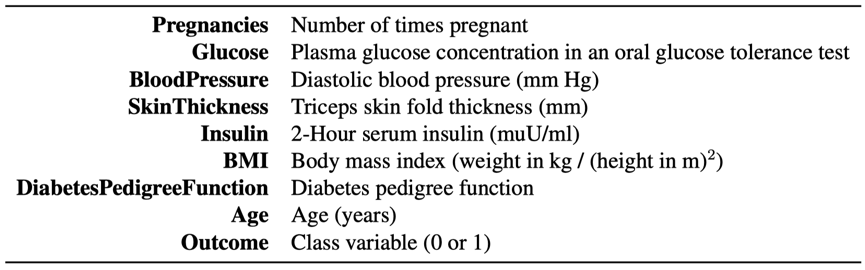

**----- Import all libraries here -----**

In [91]:
# data manipulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data Cleaning and Analysis (15 points)

<span style="color:blue">Load the CSV file into a *DataFrame* object named **pima** using Pandas to examine the dataset and perform data cleaning:</span>
    
<span style="color:blue">1) Print the dtype of each column to review the data types of the attributes in the dataset. *(2 points)*</span>

In [92]:
# --- Your code here ---
xtrain = pd.read_csv('Xtrain.csv')
ytrain = pd.read_csv('Ytrain.csv')
xtrain.dtypes

Id                     int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
GrAppv                object
SBA_Appv              object
dtype: object

In [93]:
xtrain

,Id,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,0,"NPE Realty, LLC",Pembroke Pines,FL,33027,"TD BANK, NATIONAL ASSOCIATION",DE,334516,16-Apr-10,2010,...,0,0,1,N,N,1-May-10,"$2,000,000.00",$0.00,"$2,000,000.00","$1,500,000.00"
1,1,"KEVCO CONSTRUCTION, LLC",SANDY,UT,84094,ZIONS FIRST NATIONAL BANK,UT,236115,30-Jan-10,2010,...,3,0,1,N,N,1-Feb-10,"$17,000.00",$0.00,"$17,000.00","$17,000.00"
2,2,EAST L A SHOE REPAIR,LOS ANGELES,CA,90022,BANK OF AMERICA NATL ASSOC,NC,811430,29-Jul-02,2002,...,1,1,1,Y,N,31-Aug-02,"$17,000.00",$0.00,"$17,000.00","$8,500.00"
3,3,"RUSSLER, DANIEL C, MD",LODI,WI,53555,ASSOCIATED BANK NATL ASSOC,WI,0,10-Jun-94,1994,...,0,1,0,N,N,31-Jul-94,"$137,000.00",$0.00,"$137,000.00","$123,300.00"
4,4,AFFORDABLE FAMILY DENISTRY LLC,LEBANON,MO,65536,COMMERCE BANK,MO,621210,6-Feb-06,2006,...,2,1,1,T,N,31-Mar-06,"$46,665.00",$0.00,"$25,000.00","$12,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,WESTTOWN GULF,WEST CHESTER,PA,19382,CITIZENS BANK NATL ASSOC,RI,445120,29-Aug-03,2003,...,1,1,1,Y,N,30-Sep-03,"$46,231.00",$0.00,"$30,000.00","$15,000.00"
49996,49996,HS ELECTRIC,ENCINO,CA,91316,BANK OF AMERICA NATL ASSOC,NC,541513,12-Jul-04,2004,...,6,1,1,N,N,31-Jul-04,"$49,750.00",$0.00,"$50,000.00","$25,000.00"
49997,49997,"HARDIN GRAIN ELEVATOR, INC.",HARDIN,KY,42048,COMMUNITY FINAN SERVICES BK,KY,0,4-Oct-91,1992,...,0,1,0,N,N,31-Jan-92,"$260,000.00",$0.00,"$260,000.00","$221,000.00"
49998,49998,THE WOODLANDS GOLF COURSE,SARASOTA,FL,34234,IBERIABANK,FL,713910,19-Jan-96,1996,...,0,1,0,N,N,30-Sep-96,"$1,193,500.00",$0.00,"$1,193,500.00","$749,995.00"


In [94]:
for column in xtrain.columns:
    print(column,len(xtrain[column].unique()))

Id 50000
Name 48757
City 9488
State 51
Zip 13794
Bank 2784
BankState 53
NAICS 1118
ApprovalDate 6934
ApprovalFY 47
Term 325
NoEmp 207
NewExist 4
CreateJob 98
RetainedJob 144
FranchiseCode 849
UrbanRural 3
RevLineCr 5
LowDoc 8
DisbursementDate 2434
DisbursementGross 14120
BalanceGross 1
GrAppv 3951
SBA_Appv 6048


In [95]:
data = pd.merge(xtrain, ytrain)

<span style="color:blue">2) Are there any missing values in the dataset? For each attribute in the dataset, print out the total number of missing values in the dataset for that attribute. Drop the rows which have a missing value in any of their columns. *(3 points)*
<br/>
</span>

In [96]:
# --- Your code to remove missing values:
pima = pima.dropna(how='any')

<span style="color:blue">3) Show the count of “0”s and “1”s in *Outcome* using a bar graph. Write down what you observe in the bar plot. Assuming that we regard this distribution as reasonably unbalanced, how does this observation affect what metrics you would use to evaluate a classifier for predicting *Outcome*?*(5 points)*
<br/>_(Hint: you can draw the bar plot with the help of **sb.countplot**.)_
</span>

<AxesSubplot:xlabel='LowDoc', ylabel='count'>

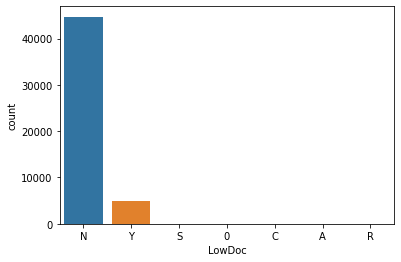

In [67]:
# --- Your code here ---
sb.countplot(data['LowDoc'])

<AxesSubplot:xlabel='RevLineCr', ylabel='count'>

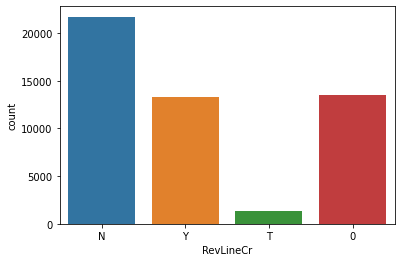

In [68]:
sb.countplot(data['RevLineCr'])

<AxesSubplot:xlabel='UrbanRural', ylabel='count'>

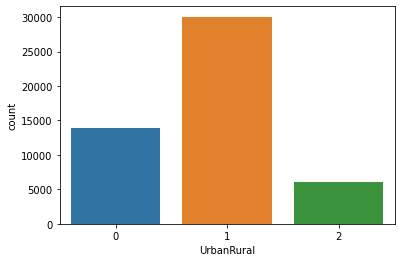

In [69]:
sb.countplot(data['UrbanRural'])

<AxesSubplot:xlabel='NewExist', ylabel='count'>

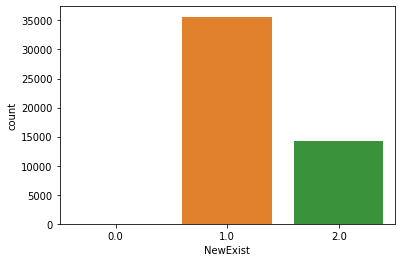

In [70]:
sb.countplot(data['NewExist'])

In [71]:
data = data[data['LowDoc'].isin(['N', 'Y'])]

In [72]:
data = data[data['NewExist'].isin([1.0, 2.0])]

In [83]:
def bank_rate(row):
    bank = float(''.join(row['GrAppv'][1:-4].split(',')))
    gross = float(''.join(row['DisbursementGross'][1:-4].split(',')))
    if gross!=0:
        return bank/gross
    return 0

In [84]:
def sba_rate(row):
    sba = float(''.join(row['SBA_Appv'][1:-4].split(',')))
    gross = float(''.join(row['DisbursementGross'][1:-4].split(',')))
    if gross!=0:
        return sba/gross
    return 0

In [86]:
data['bankRate'] = data.apply (lambda row: bank_rate(row), axis=1)

In [87]:
data['sbaRate'] = data.apply (lambda row: sba_rate(row), axis=1)

<b>The number of 0s is roughly 2 times the number of 1s. As the distribution is unbalanced, it's better to use F1 score or AURPC to measure.</b>

<span style="color:blue">4) Generate a 9x9 heatmap plot showing the correlation between any two features (including target: outcome), as follows: **sb.clustermap(pima.corr(), annot=True)**. What does the heatmap suggest about the features that may be most useful in predicting *Outcome*? *(5 points)*<br/>

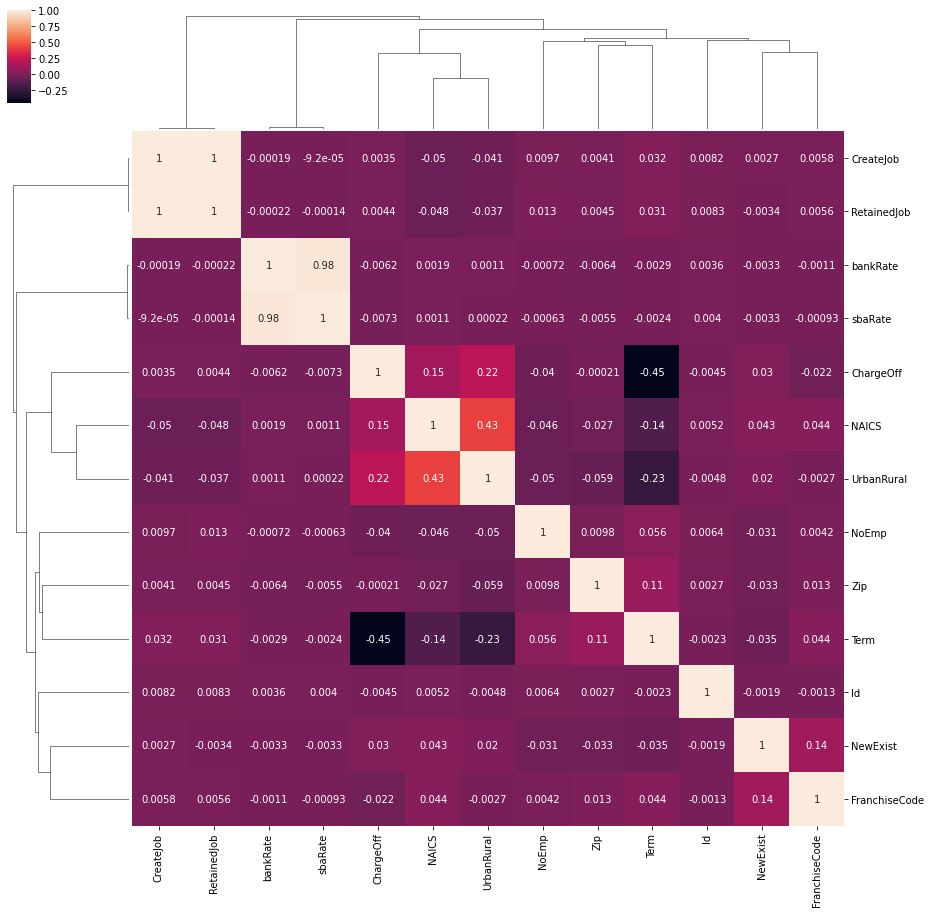

In [89]:
# --- Your code here ---
sb.clustermap(data.corr(), annot=True, figsize=(15,15))

<b>Glucose has the highest correlation with the Outcome</b>

## 2. Feature Transformation (15 points)

We observe that all the variables in the dataset except the target variable *Outcome* are continuous. In this section, you will perform feature transformation on the continuous variables to generate two sets of features that will be used in the subsequent classification task.

**Feature Set 1 - Continuous to Categorical**

<span style="color:blue">1) Often when dealing with continuous variables like *BMI* or *BloodPressure*,  we may wish  to transform these continuous variables into categorical variables, which may be better predictors of *Outcome*. Cut the continuous values of each feature into non-overlapping buckets: for Glucose, adopt the glucose level guidelines given by American Diabetes Association:<br/>
*- Normal: $< 140$mg/dl of glucose,<br/>*
*- Prediabetes: $\ge 140$ but $<200$mg/dl of glucose,<br/>*
*- Diabetes: $> 200$mg/dl of glucose<br/>*
To do this, setting **inf = float('inf')**, you can use **pd.cut** with bins of **[-inf,139.99,199.99,inf]** and labels of **['Normal', 'Prediabetes', 'Diabetes']**. Similarly, for *BMI*, use a similar approach with the cutoffs (from the World Health Organization):<br>
*- Underweight: < 18.5<br/>*
*- Normal: $\ge 18.5$ but $<25$<br/>*
*- Overweight: $\ge 25$ but $<30$<br/>*
*- Obese: $\ge 30$<br/>*
Keep the remaining variables (other than *BMI* and *BloodPressure*) unchanged. Name the resulting DataFrame as __pima1__. pima1 should still contains 9 columns with the same set of column names as pima. Use **pima1.head()** to show the top rows. *(8 points)*</span>
    

In [6]:
# --- Your code here ---
inf = float('inf')
pima1 = pima.copy()
pima1.Glucose = pd.cut(x=pima1.Glucose, bins=[-inf, 139.99, 199.99, inf], labels=['Glucose_Normal', 'Prediabetes', 'Diabetes'])
pima1.BMI = pd.cut(x=pima1.BMI, bins=[-inf, 18.5, 25, 30, inf], labels=['Underweight', 'BMI_Normal', 'Overweight', 'Obese'])
# --- End of your code ---

print(pima1.shape)
pima1.head()

(765, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,Prediabetes,72.0,35.0,0,Obese,0.627,50,1
1,1,Glucose_Normal,66.0,29.0,0,Overweight,0.351,31,0
2,8,Prediabetes,64.0,0.0,0,BMI_Normal,0.672,32,1
3,1,Glucose_Normal,66.0,23.0,94,Overweight,0.167,21,0
4,0,Glucose_Normal,40.0,35.0,168,Obese,2.288,33,1


<span style="color:blue">2) Next, we convert the generated categorical features (**Glucose** and **BMI**) into binary features using the one-hot encoding scheme: given a categorical feature containing $m$ categories, one-hot encoding will encode each value into a vector of size $m$ with only one of its values as 1 (indicating it as active), and its other values as 0. Use **pima1.head()** to show the top rows of the encoded **pima1**. *(5 points)*</span>

<span style="color:blue">*(Hint: you can use **pd.getdummies()** to convert each desired categorical feature in **pima1** into multiple one-hot features.)*</span>

In [7]:
# --- Your code here ---
pima1 = pima1.join(pd.get_dummies(pima1.Glucose))
pima1 = pima1.join(pd.get_dummies(pima1.BMI))
pima1 = pima1.drop(columns=['Glucose','BMI'])

# --- End of your code ---

print(pima1.shape)
pima1.head()

(765, 14)


,Pregnancies,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,Glucose_Normal,Prediabetes,Diabetes,Underweight,BMI_Normal,Overweight,Obese
0,6,72.0,35.0,0,0.627,50,1,0,1,0,0,0,0,1
1,1,66.0,29.0,0,0.351,31,0,1,0,0,0,0,1,0
2,8,64.0,0.0,0,0.672,32,1,0,1,0,0,1,0,0
3,1,66.0,23.0,94,0.167,21,0,1,0,0,0,0,1,0
4,0,40.0,35.0,168,2.288,33,1,1,0,0,0,0,0,1


**Feature Set 2 - Continuous Features**

<span style="color:blue">3) For the second feature set, we use the original continuous variables from **pima** unchanged. Construct a new copy, **pima2** of the original **pima** dataset. Show its top rows using **pima2.head()**. *(2 points)*</span>

In [8]:
# --- Your code here ---
pima2 = pima.copy()
# --- End of your code ---

print(pima2.shape)
pima2.head()

(765, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0,33.6,0.627,50,1
1,1,85,66.0,29.0,0,26.6,0.351,31,0
2,8,183,64.0,0.0,0,23.3,0.672,32,1
3,1,89,66.0,23.0,94,28.1,0.167,21,0
4,0,137,40.0,35.0,168,43.1,2.288,33,1


## 3. Model Construction (30 points)

Your task in this section is to use the derived feature sets from the previous section to construct classification models for diabetes outcome prediction (0 or 1).  We have split the data into training and test sets for you as shown below (you need to run the cell below): e.g. x_train1 and y_train1 are the training features and labels for **pima1**.

In [9]:
# pima1 split
x1 = pima1.drop(columns='Outcome')
y1 = pima1['Outcome']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)

# pima2 split
x2 = pima2.drop(columns='Outcome')
y2 = pima2['Outcome']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state=0)

print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(765, 13) (765,)
(765, 8) (765,)


<span style="color:blue">1) Experiment with the 5 classification models below from scikit-learn (directly using the scikit-learn functions imported with their default hyperparameter settings on **pima1** and **pima2** (You should thus perform $5 \times 2$ times of model training and evaluation, for the 5 models and 2 feature sets):<br/></span>

<span style="color:blue">- KNN</span><br/>
<span style="color:blue">- logistic regression</span><br/>
<span style="color:blue">- decision tree<br/></span>
<span style="color:blue">- random forest<br/></span>
<span style="color:blue">- gradient boosting machine<br/></span>
    
<span style="color:blue">You should perform model training on x_train1 and x_train2,  and perform evaluation on x_test1 and x_test2.  Use **accuracy** and **weighted F1** as evaluation metrics, and save the results of different models in the defined lists **pima1_acc**, **pima2_acc**, **pima1_f1**, **pima2_f1**. Note that the order of results in each list should match the model order provided in **model_names**. Print the **accuracy_record** table and **F1_record** table using the provided code. *(13 points)*</span>

In [10]:
# K-nearest neighbors, Logistic regression, Decision trees, Random forest, Gradient boosting machine
model_names = ['KNN', 'LR', 'DT', 'RF', 'GBM']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []

# --- Your code here ---
for model in [KNeighborsClassifier(), LogisticRegression(), 
              DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]:
    model.fit(x_train1, y_train1)
    y_pred1 = model.predict(x_test1)
    acc = round(accuracy_score(y_test1, y_pred1) * 100, 2)
    f1 = round(f1_score(y_test1, y_pred1, average='weighted') * 100, 2)
    pima1_acc.append(acc)
    pima1_f1.append(f1)

for model in [KNeighborsClassifier(), LogisticRegression(), 
              DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]:
    model.fit(x_train2, y_train2)
    y_pred2 = model.predict(x_test2)
    acc = round(accuracy_score(y_test2, y_pred2) * 100, 2)
    f1 = round(f1_score(y_test2, y_pred2, average='weighted') * 100, 2)
    pima2_acc.append(acc)
    pima2_f1.append(f1)


# --- End of your code ---

accuracy_record = pd.DataFrame({'Model': model_names, 'pima1_acc': pima1_acc, 'pima2_acc': pima2_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'pima1_f1': pima1_f1, 'pima2_f1': pima2_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

       pima1_acc  pima2_acc  acc_mean
Model                                
KNN       68.750     72.920     70.84
LR        78.120     82.290     80.21
DT        65.100     72.920     69.01
RF        75.000     73.960     74.48
GBM       72.920     77.600     75.26
avg       71.978     75.938     73.96


       pima1_f1  pima2_f1  F1_mean
Model                             
KNN      67.960    72.670   70.320
LR       77.140    81.620   79.380
DT       66.180    73.030   69.600
RF       74.210    73.450   73.830
GBM      72.390    77.100   74.740
avg      71.576    75.574   73.574


<span style="color:blue">2) According to the results above, which feature set is better, pima1 or pima2? Select the better one to be used in the following tasks. *(1 points)*</span>

<b>pima2 is better.</b>

<span style="color:blue">3) According to the results above, which model would you recommend to the hospital? *(1 points)*</span>

<b>Logistic Regression.</b>

<span style="color:blue">4) Select any of the 5 classification models from 1). Perform grid search with 10 fold cross-validation for tuning any of its hyperparameters (at least one, but more are acceptable) on the training set of either **pima1** or **pima2** (according to your choice in 2)), using accuracy as the scoring metric. Print the configuration of the best selected model and its prediction **accuracy** and **weighted F1** scores on the corresponding test set. *(10 points)*</span>

<span style="color:blue">*(Hint: Use **sklearn.model_selection.GridSearchCV** for grid search.)*</span>

<b>Model: Logistic Regression</b>

In [12]:
# --- Your code here ---
parameters = {'penalty':['l1', 'l2'], 'C':[0.1, 0.2, 0.5, 1, 2, 5, 10]}
lr = LogisticRegression()
clf = GridSearchCV(estimator=lr, param_grid=parameters, scoring='accuracy', cv=10)
clf.fit(x_train2, y_train2)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [13]:
print(clf.best_params_)
y_pred2 = clf.predict(x_test2)
acc = round(accuracy_score(y_test2, y_pred2) * 100, 2)
f1 = round(f1_score(y_test2, y_pred2, average='weighted') * 100, 2)
print('accuracy:%.2f, f1_score:%.2f'%(acc,f1))

{'C': 10, 'penalty': 'l1'}
accuracy:81.25, f1_score:80.66


<span style="color:blue">5) Suppose your model is experiencing low training error but high test error, i.e. overfitting. For each of the 5 methods, select one of its hyperparameters (i.e. any input argument that could be passed to its scikit-learn training function) and state how the hyperparameter could be modified to address the problem of overfitting. (Justification is not required) *(5 points)*</span>

- KNN: *n_neighbors* **+**
- Logistic Regression: *max_iter* **-**
- Decision Tree: *max_depth* **-**
- Random Forest: *n_estimators* **+**
- Gradient Boosting Machine: *min_impurity_decrease* **+**